## 問題

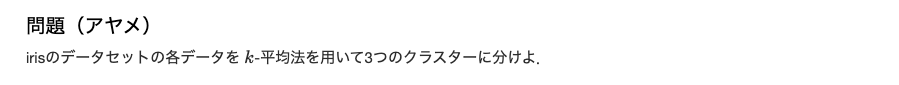

In [1]:
from IPython.display import Image
Image('iris.png')

## 解答

In [2]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
iris = px.data.iris()
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species_id']

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [5]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [6]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [7]:
km.inertia_

140.96581663074699

### エルボー法

In [8]:
import matplotlib.pyplot as plt

In [9]:
X.shape

(150, 4)

In [10]:
n_clusters_lst = list(range(1,150,5))
inertia_lst = []

for n_clusters in n_clusters_lst:
    km = KMeans(n_clusters=n_clusters, random_state=1)
    km.fit(X)
    inertia_lst.append(km.inertia_)

In [11]:
inertia_lst[:5]

[680.8244000000001,
 38.95701115711986,
 24.721876253132834,
 18.21483621933622,
 14.037352813852817]

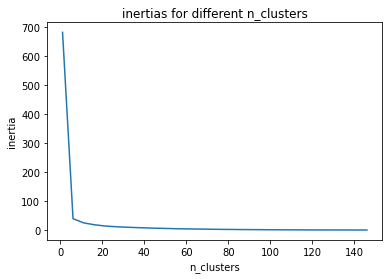

In [12]:
_, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(n_clusters_lst, inertia_lst)
ax.set_xlabel('n_clusters')
ax.set_ylabel('inertia')
ax.set_title('inertias for different n_clusters')
plt.show()

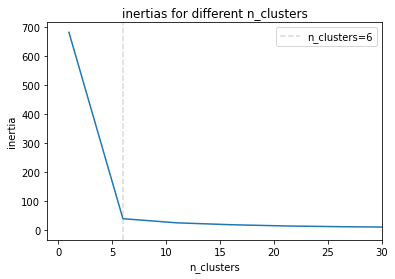

In [13]:
_, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(n_clusters_lst, inertia_lst)
ax.set_xlabel('n_clusters')
ax.set_ylabel('inertia')

ax.set_xlim(-1, 30)
ax.axvline(6, color='gray', alpha=0.3, linestyle='--', label='n_clusters=6')
ax.legend()

ax.set_title('inertias for different n_clusters')
plt.show()

### シルエット分析

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [15]:
km = KMeans(n_clusters=6, random_state=1)
y_km = km.fit_predict(X_scaled)
y_km[:10]

array([1, 1, 1, 1, 4, 4, 1, 1, 1, 1], dtype=int32)

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [17]:
silhouette_vals = silhouette_samples(X_scaled, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

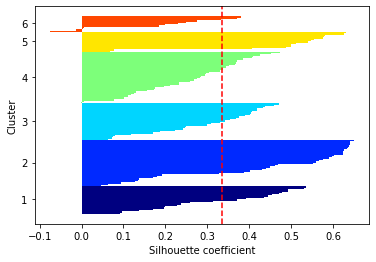

In [18]:
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()